In [1]:
import pandas as pd

# Load the dataset from the CSV file
df = pd.read_csv('smartcart_customers.csv')

In [2]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


# Data preprocessing by handling missing values

In [4]:
income_median = df['Income'].median()
df['Income'] = df['Income'].fillna(income_median)

# 3. Verify the changes
print("\nMissing values after cleaning:")
print(df.isnull().sum().sum())

# Save the cleaned dataset
df.to_csv('smartcart_cleaned.csv', index=False)
df.head()


Missing values after cleaning:
0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


# Feature Engineering 

In [6]:
# We use 2024 as the reference year for calculation
df['Age'] = 2024 - df['Year_Birth']

# 2. Feature Engineering: Calculate Customer Joining Days
# Convert Dt_Customer string to a datetime object
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

# Calculate days since joining relative to the most recent enrollment in the dataset
# This represents the total number of days the person has been a customer.
newest_customer_date = df['Dt_Customer'].max()
df['Customer_Days'] = (newest_customer_date - df['Dt_Customer']).dt.days

# Display the newly created features
print(df[['Year_Birth', 'Age', 'Dt_Customer', 'Customer_Days']].head())

# Save the updated dataset with new features
df.to_csv('smartcart_featured.csv', index=False)

   Year_Birth  Age Dt_Customer  Customer_Days
0        1957   67  2012-09-04            663
1        1954   70  2014-03-08            113
2        1965   59  2013-08-21            312
3        1984   40  2014-02-10            139
4        1981   43  2014-01-19            161


# Feature Engineering—Spending, Children, Education and Marital Status

In [7]:
# 1. Total Spending: Sum of all product-related amount columns
# Includes Wine, Fruits, Meat, Fish, Sweets, and Gold
df['Total_Spending'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + 
                        df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

# 2. Total Children: Sum of children and teenagers in the household
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# 3. Education Mapping: Grouping into Undergraduate, Graduate, and Postgraduate
# Undergraduate: Basic and 2n Cycle (Diploma-level)
# Graduate: Graduation (Bachelor level)
# Postgraduate: Master and PhD
education_map = {
    'Basic': 'Undergraduate',
    '2n Cycle': 'Undergraduate',
    'Graduation': 'Graduate',
    'Master': 'Postgraduate',
    'PhD': 'Postgraduate'
}
df['Education_Group'] = df['Education'].replace(education_map)

# 4. Marital Status Mapping: Grouping into Married, Single, and Widow
# Married: Includes 'Married' and 'Together' (living with a partner)
# Widow: Remains as 'Widow'
# Single: Includes 'Single', 'Divorced', and other solitary statuses
marital_map = {
    'Married': 'Married',
    'Together': 'Married',
    'Widow': 'Widow',
    'Single': 'Single',
    'Divorced': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}
df['Marital_Group'] = df['Marital_Status'].replace(marital_map)

# Display a sample of the new features
print("Feature Engineering Results:")
print(df[['Total_Spending', 'Total_Children', 'Education_Group', 'Marital_Group']].head())

# Save the updated dataset
df.to_csv('smartcart_final_features.csv', index=False)

Feature Engineering Results:
   Total_Spending  Total_Children Education_Group Marital_Group
0            1617               0        Graduate        Single
1              27               2        Graduate        Single
2             776               0        Graduate       Married
3              53               1        Graduate       Married
4             422               1    Postgraduate       Married


# Dropping Unnecessary Columns

In [4]:
import pandas as pd
from datetime import datetime

# 1. Load the dataset [cite: 4, 11]
df = pd.read_csv('smartcart_customers.csv')

# 2. Handle Missing Values [cite: 14]
# Fill missing Income values with the median to avoid outlier bias
df['Income'] = df['Income'].fillna(df['Income'].median())

# 3. Feature Engineering [cite: 8, 9]

# A. Convert Year_Birth to Age (using 2024 as reference) [cite: 14]
df['Age'] = 2024 - df['Year_Birth']

# B. Calculate Customer Joining Days [cite: 14]
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
newest_date = df['Dt_Customer'].max()
df['Customer_Days'] = (newest_date - df['Dt_Customer']).dt.days

# C. Total Spending (Sum of all 6 product categories) [cite: 16]
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

# D. Total Children (Sum of kids and teens) [cite: 14]
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# E. Simplify Education and Marital Status [cite: 14]
education_map = {
    'Basic': 'Undergraduate', '2n Cycle': 'Undergraduate',
    'Graduation': 'Graduate', 'Master': 'Postgraduate', 'PhD': 'Postgraduate'
}
df['Education_Group'] = df['Education'].map(education_map)

marital_map = {
    'Married': 'Married', 'Together': 'Married',
    'Widow': 'Widow', 'Single': 'Single', 'Divorced': 'Single',
    'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'
}
df['Marital_Group'] = df['Marital_Status'].map(marital_map)

# 4. Drop Unnecessary/Redundant Columns 
cols_to_drop = [
    'ID', 'Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 
    'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# This creates the final dataframe for the clustering system [cite: 7]
df_final = df.drop(columns=cols_to_drop)

# 5. Review the final structure
print("--- Final Dataset for Clustering ---")
print(df_final.info())
print("\nFirst 5 Rows:")
print(df_final.head())
df.head()

--- Final Dataset for Clustering ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Income               2240 non-null   float64
 2   Recency              2240 non-null   int64  
 3   NumDealsPurchases    2240 non-null   int64  
 4   NumWebPurchases      2240 non-null   int64  
 5   NumCatalogPurchases  2240 non-null   int64  
 6   NumStorePurchases    2240 non-null   int64  
 7   NumWebVisitsMonth    2240 non-null   int64  
 8   Complain             2240 non-null   int64  
 9   Response             2240 non-null   int64  
 10  Age                  2240 non-null   int64  
 11  Customer_Days        2240 non-null   int64  
 12  Total_Spending       2240 non-null   int64  
 13  Total_Children       2240 non-null   int64  
 14  Education_Group      2240 non-null   object 
 15  M

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Days,Total_Spending,Total_Children,Education_Group,Marital_Group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,1,67,663,1617,0,Graduate,Single
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,70,113,27,2,Graduate,Single
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,59,312,776,0,Graduate,Married
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,40,139,53,1,Graduate,Married
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,43,161,422,1,Postgraduate,Married


In [5]:
# 2. Handle Missing Values
# Fill 24 missing 'Income' records with the median [cite: 36]
df['Income'] = df['Income'].fillna(df['Income'].median())

# 3. Feature Engineering (Creating summaries before dropping raw data)

# A. Age from Year_Birth [cite: 36]
df['Age'] = 2024 - df['Year_Birth']

# B. Customer Tenure (Days since enrollment) [cite: 36]
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Customer_Days'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

# C. Total Spending (Sum of all 6 product categories) [cite: 38]
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

# D. Total Children (Kids + Teens) [cite: 36]
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# E. Categorical Grouping (Education and Marital Status) [cite: 36]
df['Education_Group'] = df['Education'].replace({
    'Basic': 'Undergraduate', '2n Cycle': 'Undergraduate',
    'Graduation': 'Graduate', 'Master': 'Postgraduate', 'PhD': 'Postgraduate'
})

df['Marital_Group'] = df['Marital_Status'].replace({
    'Married': 'Married', 'Together': 'Married', 'Widow': 'Widow',
    'Single': 'Single', 'Divorced': 'Single', 'Alone': 'Single', 
    'Absurd': 'Single', 'YOLO': 'Single'
})

# 4. Drop Unnecessary/Redundant Columns
# We remove the raw columns now that we have the engineered versions
cols_to_drop = [
    'ID', 'Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 
    'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

df_final = df.drop(columns=cols_to_drop)

# 5. Result Verification
print("--- Final Dataset Columns ---")
print(df_final.columns.tolist())
print("\nFirst 5 Rows of Processed Data:")
print(df_final.head())

--- Final Dataset Columns ---
['Education', 'Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age', 'Customer_Days', 'Total_Spending', 'Total_Children', 'Education_Group', 'Marital_Group']

First 5 Rows of Processed Data:
    Education   Income  Recency  NumDealsPurchases  NumWebPurchases  \
0  Graduation  58138.0       58                  3                8   
1  Graduation  46344.0       38                  2                1   
2  Graduation  71613.0       26                  1                8   
3  Graduation  26646.0       26                  2                2   
4         PhD  58293.0       94                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
0                   10                  4                  7         0   
1                    1                  2                  5         0   
2                    2      

In [9]:
df_final

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Days,Total_Spending,Total_Children,Education_Group,Marital_Group
0,Graduation,58138.0,58,3,8,10,4,7,0,1,67,663,1617,0,Graduate,Single
1,Graduation,46344.0,38,2,1,1,2,5,0,0,70,113,27,2,Graduate,Single
2,Graduation,71613.0,26,1,8,2,10,4,0,0,59,312,776,0,Graduate,Married
3,Graduation,26646.0,26,2,2,0,4,6,0,0,40,139,53,1,Graduate,Married
4,PhD,58293.0,94,5,5,3,6,5,0,0,43,161,422,1,Postgraduate,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,61223.0,46,2,9,3,4,5,0,0,57,381,1341,1,Graduate,Married
2236,PhD,64014.0,56,7,8,2,5,7,0,0,78,19,444,3,Postgraduate,Married
2237,Graduation,56981.0,91,1,2,3,13,6,0,0,43,155,1241,0,Graduate,Single
2238,Master,69245.0,8,2,6,5,10,3,0,0,68,156,843,1,Postgraduate,Married


In [10]:
df_final.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Days,Total_Spending,Total_Children,Education_Group,Marital_Group
0,Graduation,58138.0,58,3,8,10,4,7,0,1,67,663,1617,0,Graduate,Single
1,Graduation,46344.0,38,2,1,1,2,5,0,0,70,113,27,2,Graduate,Single
2,Graduation,71613.0,26,1,8,2,10,4,0,0,59,312,776,0,Graduate,Married
3,Graduation,26646.0,26,2,2,0,4,6,0,0,40,139,53,1,Graduate,Married
4,PhD,58293.0,94,5,5,3,6,5,0,0,43,161,422,1,Postgraduate,Married


# Identify Outlier Counts

Data reduced from 2240 to 2173 rows for cleaner visualization.


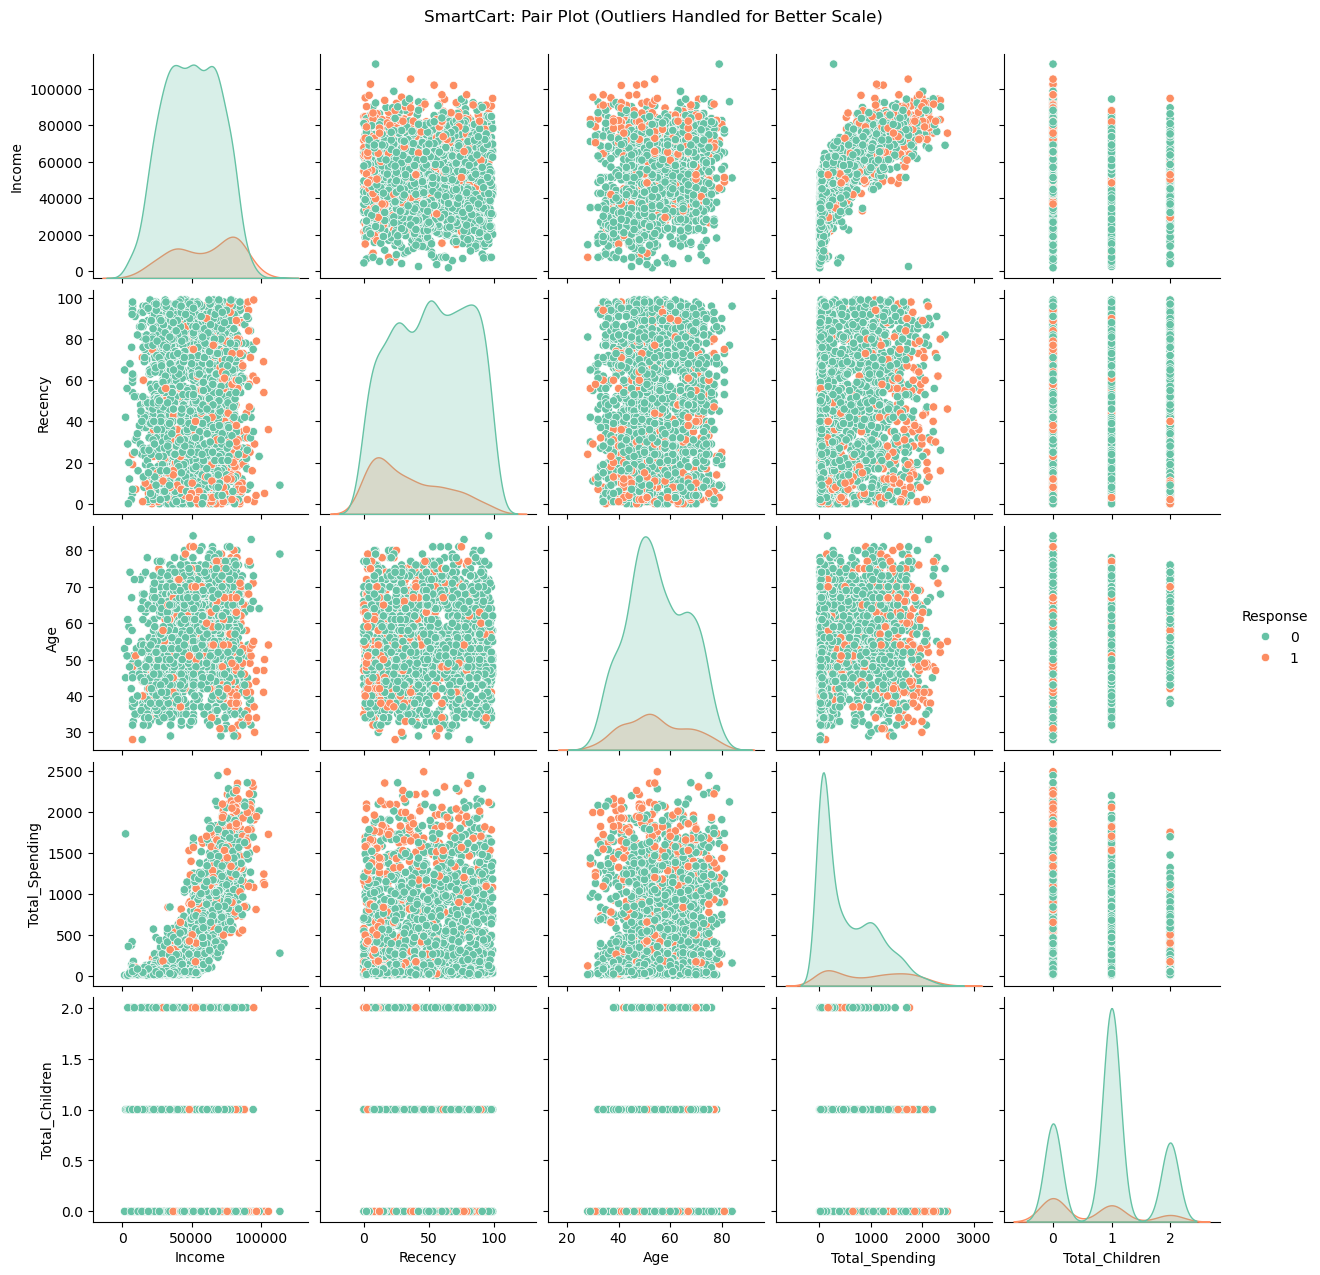

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load data and re-apply Feature Engineering (Ensuring df exists)
df = pd.read_csv('smartcart_customers.csv')
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Age'] = 2024 - df['Year_Birth']
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Subset of columns for the pair plot
cols_to_plot = ['Income', 'Recency', 'Response', 'Age', 'Total_Spending', 'Total_Children']
df_subset = df[cols_to_plot]

# 2. Handling Outliers: Filtering the data
# We create a 'cleaned' version for display by removing values outside 1.5 * IQR
df_cleaned = df_subset.copy()
outlier_features = ['Income', 'Age', 'Total_Spending', 'Total_Children']

for col in outlier_features:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter: Keep only rows within the statistical bounds
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"Data reduced from {len(df_subset)} to {len(df_cleaned)} rows for cleaner visualization.")

# 3. Create the Pair Plot with the cleaned data
# Using 'Response' as hue helps see patterns in how different segments reacted to marketing
sns.pairplot(df_cleaned, hue='Response', palette='Set2', diag_kind='kde')
plt.suptitle('SmartCart: Pair Plot (Outliers Handled for Better Scale)', y=1.02)
plt.savefig('smartcart_pairplot_cleaned.png')

# Handling the outliers

In [18]:
# 4. Record the size before removing outliers
size_with_outliers = len(df)

# 5. Handle Outliers
# Criteria: Remove customers with Income > 600,000 and Age > 90
df_cleaned = df[(df['Income'] <= 600000) & (df['Age'] <= 90)]

# 6. Record the size after removing outliers
size_without_outliers = len(df_cleaned)

# 7. Display the results
print(f"Dataset size WITH outliers: {size_with_outliers}")
print(f"Dataset size WITHOUT outliers: {size_without_outliers}")
print(f"Total outliers removed: {size_with_outliers - size_without_outliers}")

Dataset size WITH outliers: 2240
Dataset size WITHOUT outliers: 2236
Total outliers removed: 4


# Plotting HeatMap

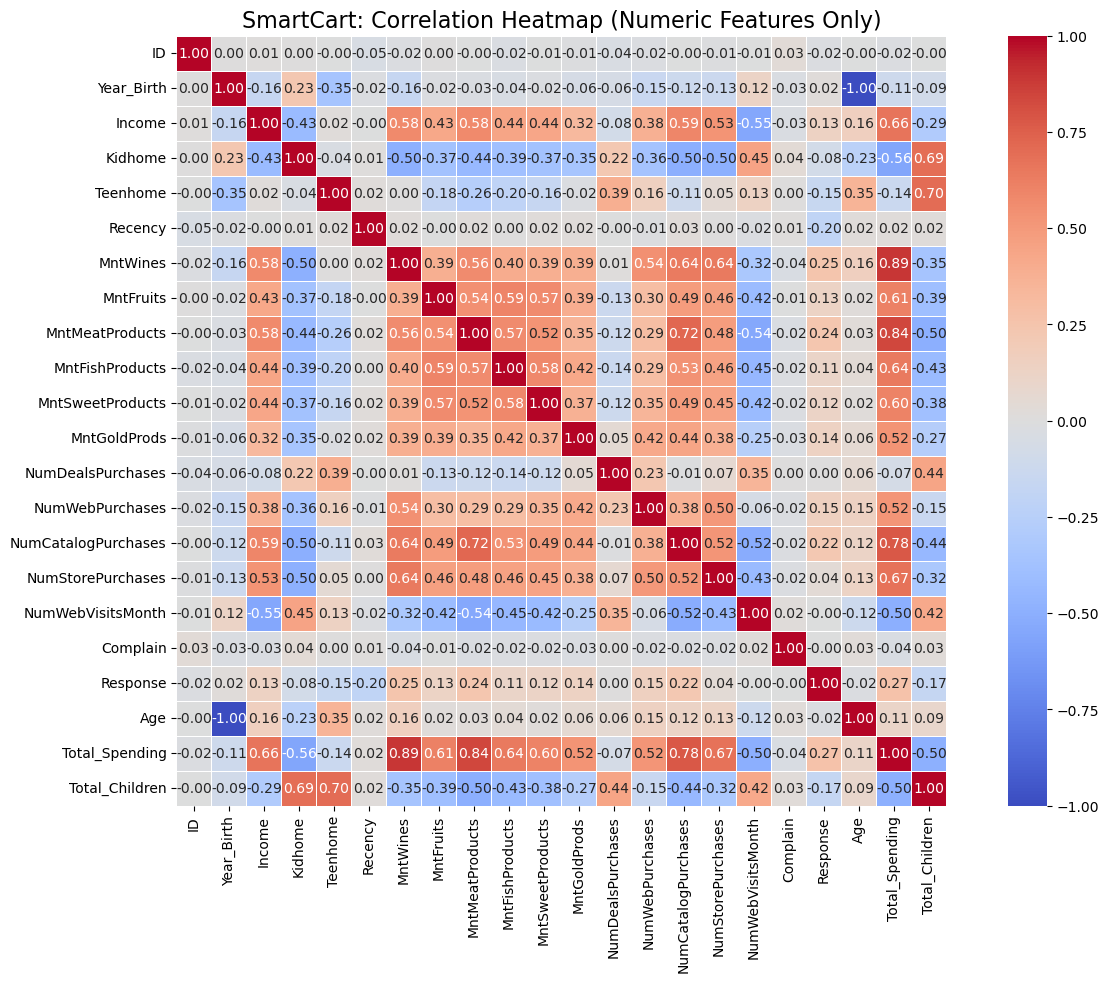

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the dataset
df = pd.read_csv('smartcart_customers.csv')

# 2. Basic Preprocessing
# We fill missing Income values and create the engineered features 
# to make the heatmap more useful for clustering insights.
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Age'] = 2024 - df['Year_Birth']
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# 3. Select ONLY numeric columns
# This automatically removes categorical data like 'Education' or 'Marital_Status'
df_numeric = df.select_dtypes(include=[np.number])

# 4. Calculate the Correlation Matrix
corr_matrix = df_numeric.corr()

# 5. Plot the Heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title('SmartCart: Correlation Heatmap (Numeric Features Only)', fontsize=16)
plt.savefig('smartcart_correlation_heatmap.png')

# Feature Encoding

In [5]:
# 1. Load the original dataset
df = pd.read_csv('smartcart_customers.csv')

# 2. Re-apply essential Preprocessing & Feature Engineering
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Age'] = 2024 - df['Year_Birth']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Customer_Days'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Simplify textual categories for better grouping
df['Education_Group'] = df['Education'].replace({
    'Basic': 'Undergraduate', '2n Cycle': 'Undergraduate',
    'Graduation': 'Graduate', 'Master': 'Postgraduate', 'PhD': 'Postgraduate'
})
df['Marital_Group'] = df['Marital_Status'].replace({
    'Married': 'Married', 'Together': 'Married', 'Widow': 'Widow',
    'Single': 'Single', 'Divorced': 'Single', 'Alone': 'Single', 
    'Absurd': 'Single', 'YOLO': 'Single'
})

# 3. Drop Raw/Redundant Columns
cols_to_drop = ['ID', 'Year_Birth', 'Marital_Status', 'Education', 'Kidhome', 
                'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 
                'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_prepared = df.drop(columns=cols_to_drop)

# 4. Handle Outliers (Income > 600k and Age > 90)
df_final_clean = df_prepared[(df_prepared['Income'] <= 600000) & (df_prepared['Age'] <= 90)]

# 5. Feature Encoding (One-Hot Encoding)
# This creates new columns with 0s and 1s and automatically drops 'Education_Group' and 'Marital_Group'
df_encoded = pd.get_dummies(df_final_clean, columns=['Education_Group', 'Marital_Group'], dtype=int)

# 6. Display the final structure
print("--- Encoded Features (First 5 Rows) ---")
print(df_encoded.head())

# Save the encoded dataset for the clustering algorithm
df_encoded.to_csv('smartcart_encoded_final.csv', index=False)

--- Encoded Features (First 5 Rows) ---
    Income  Recency  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0  58138.0       58                  3                8                   10   
1  46344.0       38                  2                1                    1   
2  71613.0       26                  1                8                    2   
3  26646.0       26                  2                2                    0   
4  58293.0       94                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  Complain  Response  Age  \
0                  4                  7         0         1   67   
1                  2                  5         0         0   70   
2                 10                  4         0         0   59   
3                  4                  6         0         0   40   
4                  6                  5         0         0   43   

   Customer_Days  Total_Spending  Total_Children  Education_Group_Grad

In [6]:
df_encoded

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Days,Total_Spending,Total_Children,Education_Group_Graduate,Education_Group_Postgraduate,Education_Group_Undergraduate,Marital_Group_Married,Marital_Group_Single,Marital_Group_Widow
0,58138.0,58,3,8,10,4,7,0,1,67,663,1617,0,1,0,0,0,1,0
1,46344.0,38,2,1,1,2,5,0,0,70,113,27,2,1,0,0,0,1,0
2,71613.0,26,1,8,2,10,4,0,0,59,312,776,0,1,0,0,1,0,0
3,26646.0,26,2,2,0,4,6,0,0,40,139,53,1,1,0,0,1,0,0
4,58293.0,94,5,5,3,6,5,0,0,43,161,422,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,2,9,3,4,5,0,0,57,381,1341,1,1,0,0,1,0,0
2236,64014.0,56,7,8,2,5,7,0,0,78,19,444,3,0,1,0,1,0,0
2237,56981.0,91,1,2,3,13,6,0,0,43,155,1241,0,1,0,0,0,1,0
2238,69245.0,8,2,6,5,10,3,0,0,68,156,843,1,0,1,0,1,0,0


# Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Load the encoded dataset from the previous step
# (Ensure df_encoded is defined or load from the saved CSV)
df_encoded = pd.read_csv('smartcart_encoded_final.csv')

# 2. Initialize the StandardScaler
scaler = StandardScaler()

# 3. Fit and Transform the data
# We scale all features to ensure they have an equal weight in distance calculations
scaled_features = scaler.fit_transform(df_encoded)

# 4. Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df_encoded.columns)

# 5. Display the first 5 rows of scaled data
print("--- Scaled Dataset Sample ---")
print(df_scaled.head())

# Save the scaled dataset for the clustering step
df_scaled.to_csv('smartcart_scaled.csv', index=False)

--- Scaled Dataset Sample ---
     Income   Recency  NumDealsPurchases  NumWebPurchases  \
0  0.288947  0.306856           0.348738         1.407639   
1 -0.262003 -0.383971          -0.168700        -1.110921   
2  0.918423 -0.798467          -0.686137         1.407639   
3 -1.182183 -0.798467          -0.168700        -0.751127   
4  0.296187  1.550344           1.383614         0.328256   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
0             2.509801          -0.552429           0.692865 -0.095001   
1            -0.568970          -1.167738          -0.131421 -0.095001   
2            -0.226884           1.293496          -0.543564 -0.095001   
3            -0.911056          -0.552429           0.280722 -0.095001   
4             0.115201           0.062879          -0.131421 -0.095001   

   Response       Age  Customer_Days  Total_Spending  Total_Children  \
0  2.386338  1.016868       1.529793        1.680176       -1.264308   
1 -0.419052  1

In [9]:
df_scaled.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Days,Total_Spending,Total_Children,Education_Group_Graduate,Education_Group_Postgraduate,Education_Group_Undergraduate,Marital_Group_Married,Marital_Group_Single,Marital_Group_Widow
0,0.288947,0.306856,0.348738,1.407639,2.509801,-0.552429,0.692865,-0.095001,2.386338,1.016868,1.529793,1.680176,-1.264308,0.992870,-0.786840,-0.35878,-1.347635,1.455524,-0.188851
1,-0.262003,-0.383971,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,-0.095001,-0.419052,1.273264,-1.191143,-0.962202,1.395139,0.992870,-0.786840,-0.35878,-1.347635,1.455524,-0.188851
2,0.918423,-0.798467,-0.686137,1.407639,-0.226884,1.293496,-0.543564,-0.095001,-0.419052,0.333146,-0.206659,0.282541,-1.264308,0.992870,-0.786840,-0.35878,0.742041,-0.687038,-0.188851
3,-1.182183,-0.798467,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-0.095001,-0.419052,-1.290693,-1.062517,-0.918994,0.065416,0.992870,-0.786840,-0.35878,0.742041,-0.687038,-0.188851
4,0.296187,1.550344,1.383614,0.328256,0.115201,0.062879,-0.131421,-0.095001,-0.419052,-1.034298,-0.953679,-0.305762,0.065416,-1.007181,1.270907,-0.35878,0.742041,-0.687038,-0.188851


In [11]:
df_scaled.shape

(2236, 19)

# Displaying scatter plot using PCA

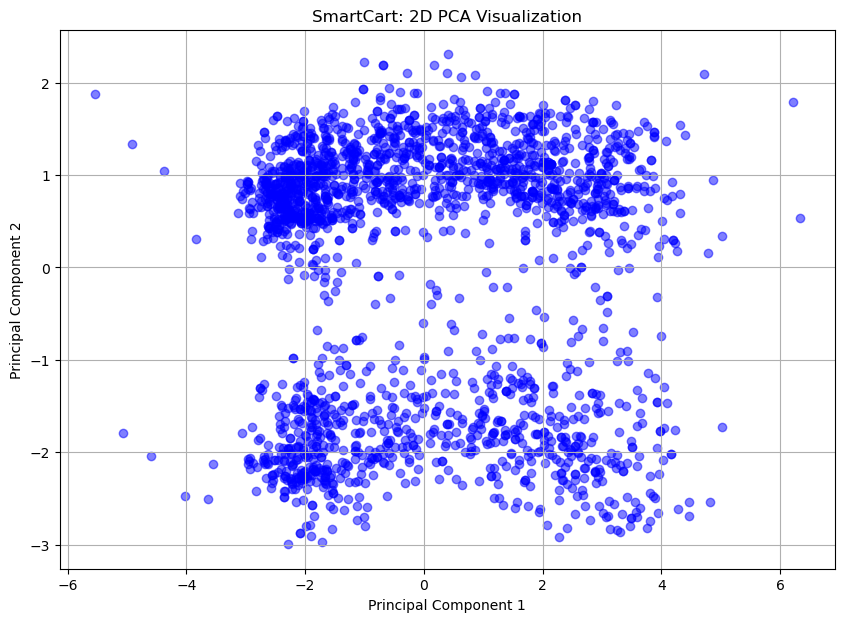

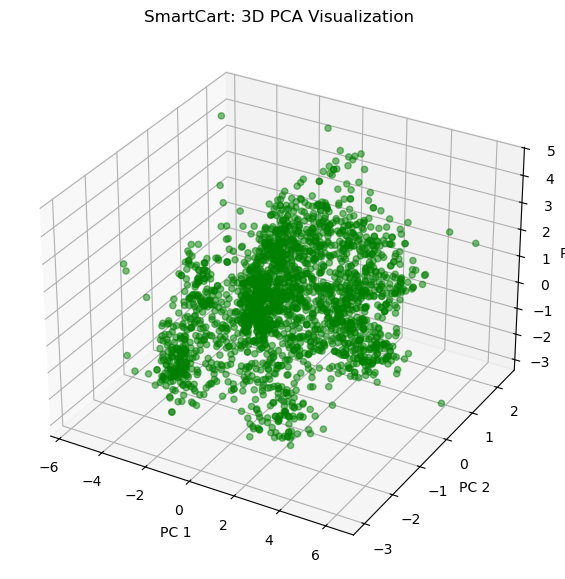

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# 1. Load the scaled data
# (Ensure df_scaled is prepared using the scaling code provided previously)
df_scaled = pd.read_csv('smartcart_scaled.csv')

# 2. PCA for 2D Visualization
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(df_scaled)

# 3. PCA for 3D Visualization
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(df_scaled)

# 4. Plotting 2D Scatter Plot
plt.figure(figsize=(10, 7))
plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SmartCart: 2D PCA Visualization')
plt.grid(True)
plt.savefig('pca_2d_plot.png')

# 5. Plotting 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], pca_3d_result[:, 2], c='green', alpha=0.5)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('SmartCart: 3D PCA Visualization')
plt.savefig('pca_3d_plot.png')

# Analyzing k value using elbow method

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

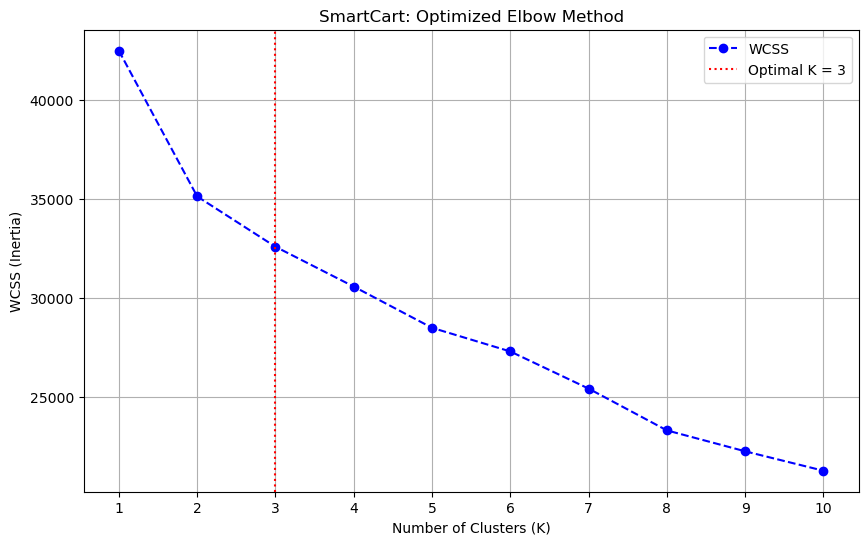

Optimal number of clusters identified: 3


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Resolve KMeans Memory Leak Warning (Windows/MKL)
os.environ["OMP_NUM_THREADS"] = "1"

# 2. Load the original dataset
df = pd.read_csv('smartcart_customers.csv')

# 3. Full Preprocessing & Feature Engineering
# Handle missing Income
df['Income'] = df['Income'].fillna(df['Income'].median())

# Create behavioral features
df['Age'] = 2024 - df['Year_Birth']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Customer_Days'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Categorical mapping
df['Education_Group'] = df['Education'].replace({
    'Basic': 'Undergraduate', '2n Cycle': 'Undergraduate',
    'Graduation': 'Graduate', 'Master': 'Postgraduate', 'PhD': 'Postgraduate'
})
df['Marital_Group'] = df['Marital_Status'].replace({
    'Married': 'Married', 'Together': 'Married', 'Widow': 'Widow',
    'Single': 'Single', 'Divorced': 'Single', 'Alone': 'Single', 
    'Absurd': 'Single', 'YOLO': 'Single'
})

# Drop raw and unnecessary columns
cols_to_drop = ['ID', 'Year_Birth', 'Marital_Status', 'Education', 'Kidhome', 
                'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 
                'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_prepared = df.drop(columns=cols_to_drop)

# Remove Outliers
df_clean = df_prepared[(df_prepared['Income'] <= 600000) & (df_prepared['Age'] <= 90)]

# One-Hot Encoding
df_encoded = pd.get_dummies(df_clean, dtype=int)

# Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# 4. Elbow Method: Calculate WCSS
wcss = []
k_range = range(1, 11)
for k in k_range:
    # n_init=10 explicitly set to suppress future warnings
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# 5. Fixed Distance Calculation (Solves NumPy 2.0 Deprecation)
# Formula: Point-to-line distance from point (k, wcss) to line between (k1, wcss1) and (kn, wcssn)
x1, y1 = k_range[0], wcss[0]
x2, y2 = k_range[-1], wcss[-1]

distances = []
for k, w in zip(k_range, wcss):
    # Using absolute coordinate geometry formula to avoid np.cross deprecation
    numerator = abs((y2 - y1) * k - (x2 - x1) * w + x2 * y1 - y2 * x1)
    denominator = ((y2 - y1)**2 + (x2 - x1)**2)**0.5
    distances.append(numerator / denominator)

best_k = k_range[np.argmax(distances)]

# 6. Final Plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='b', label='WCSS')
plt.axvline(x=best_k, color='r', linestyle=':', label=f'Optimal K = {best_k}')
plt.title('SmartCart: Optimized Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal number of clusters identified: {best_k}")

# Analyzing k value using Silhouette method

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

Optimal Number of Clusters identified by Silhouette Method: 2
Highest Silhouette Score: 0.1788


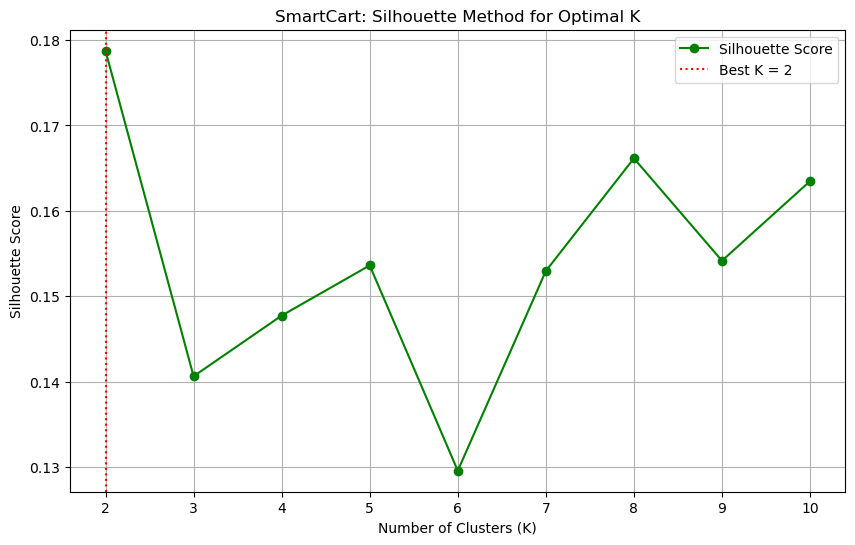

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1. Resolve KMeans Memory Leak Warning (Windows/MKL)
os.environ["OMP_NUM_THREADS"] = "1"

# 2. Load and Preprocess Data (Full Pipeline)
df = pd.read_csv('smartcart_customers.csv')

# Handle missing values and feature engineering
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Age'] = 2024 - df['Year_Birth']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Customer_Days'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Categorical simplification
df['Education_Group'] = df['Education'].replace({
    'Basic': 'Undergraduate', '2n Cycle': 'Undergraduate',
    'Graduation': 'Graduate', 'Master': 'Postgraduate', 'PhD': 'Postgraduate'
})
df['Marital_Group'] = df['Marital_Status'].replace({
    'Married': 'Married', 'Together': 'Married', 'Widow': 'Widow',
    'Single': 'Single', 'Divorced': 'Single', 'Alone': 'Single', 
    'Absurd': 'Single', 'YOLO': 'Single'
})

# Filter specific outliers (Income > 600k and Age > 90)
df_clean = df[(df['Income'] <= 600000) & (df['Age'] <= 90)].copy()

# Drop raw/redundant columns
cols_to_drop = ['ID', 'Year_Birth', 'Marital_Status', 'Education', 'Kidhome', 
                'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 
                'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_prepared = df_clean.drop(columns=cols_to_drop)

# Feature Encoding (0s and 1s) and Scaling
df_encoded = pd.get_dummies(df_prepared, dtype=int)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# 3. Silhouette Analysis: Calculate scores for K = 2 to 10
# Note: Silhouette score cannot be calculated for K=1
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    # n_init=10 explicitly set to suppress future warnings
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, cluster_labels)
    sil_scores.append(score)

# 4. Identify the Best K (highest score)
best_k = k_range[np.argmax(sil_scores)]
print(f"Optimal Number of Clusters identified by Silhouette Method: {best_k}")
print(f"Highest Silhouette Score: {max(sil_scores):.4f}")

# 5. Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, sil_scores, marker='o', linestyle='-', color='g', label='Silhouette Score')
plt.axvline(x=best_k, color='r', linestyle=':', label=f'Best K = {best_k}')
plt.title('SmartCart: Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.savefig('smartcart_silhouette_method.png')

# Elbow and Silhouette combined

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

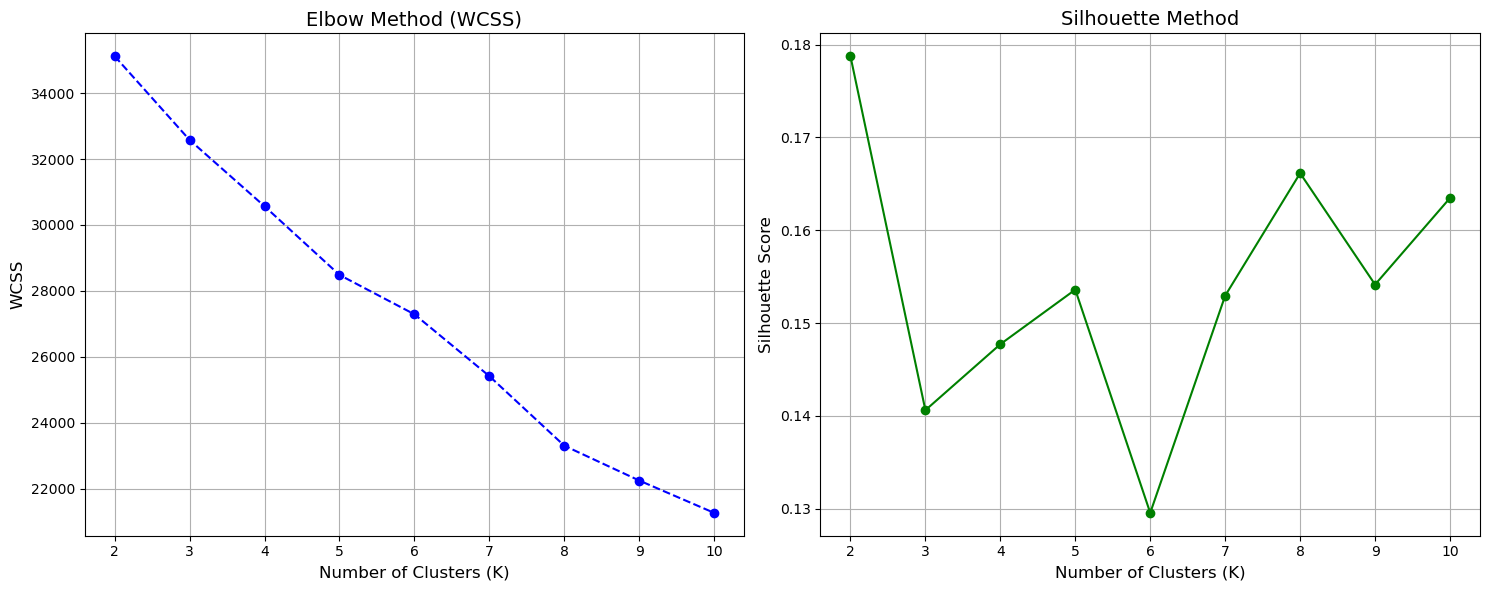

Optimal K according to Silhouette: 2


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1. Resolve KMeans Memory Leak Warning for Windows
os.environ["OMP_NUM_THREADS"] = "1"

# 2. Load and Preprocess Data
df = pd.read_csv('smartcart_customers.csv')

# Handle Missing Values & Feature Engineering
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Age'] = 2024 - df['Year_Birth']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Customer_Days'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Simplify categories
df['Education_Group'] = df['Education'].replace({
    'Basic': 'Undergraduate', '2n Cycle': 'Undergraduate',
    'Graduation': 'Graduate', 'Master': 'Postgraduate', 'PhD': 'Postgraduate'
})
df['Marital_Group'] = df['Marital_Status'].replace({
    'Married': 'Married', 'Together': 'Married', 'Widow': 'Widow',
    'Single': 'Single', 'Divorced': 'Single', 'Alone': 'Single', 
    'Absurd': 'Single', 'YOLO': 'Single'
})

# Filter Outliers and Drop Raw Columns
df_clean = df[(df['Income'] <= 600000) & (df['Age'] <= 90)].copy()
cols_to_drop = ['ID', 'Year_Birth', 'Marital_Status', 'Education', 'Kidhome', 
                'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 
                'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_prepared = df_clean.drop(columns=cols_to_drop)

# One-Hot Encoding and Scaling
df_encoded = pd.get_dummies(df_prepared, dtype=int)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# 3. Calculate WCSS and Silhouette Scores
wcss = []
sil_scores = []
k_range = range(2, 11) # Silhouette requires at least 2 clusters

for k in k_range:
    # n_init=10 avoids future warnings
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_scaled, labels))

# 4. Create Combined Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Elbow Plot (WCSS)
ax1.plot(k_range, wcss, marker='o', linestyle='--', color='b')
ax1.set_title('Elbow Method (WCSS)', fontsize=14)
ax1.set_xlabel('Number of Clusters (K)', fontsize=12)
ax1.set_ylabel('WCSS', fontsize=12)
ax1.grid(True)

# Subplot 2: Silhouette Plot
ax2.plot(k_range, sil_scores, marker='o', linestyle='-', color='g')
ax2.set_title('Silhouette Method', fontsize=14)
ax2.set_xlabel('Number of Clusters (K)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.grid(True)

plt.tight_layout()
plt.show()

# 5. Output Optimal K values
best_k_sil = k_range[np.argmax(sil_scores)]
print(f"Optimal K according to Silhouette: {best_k_sil}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

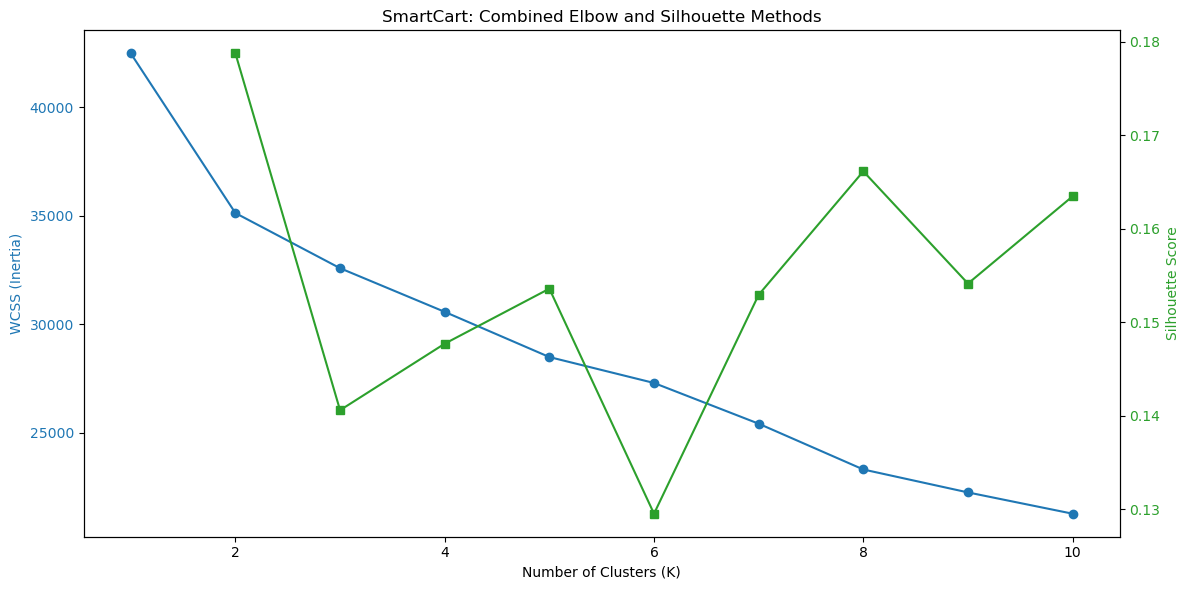

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1. Resolve potential environment warnings
os.environ["OMP_NUM_THREADS"] = "1"

# 2. Load and Preprocess Data
df = pd.read_csv('smartcart_customers.csv')

# Handling missing values and Feature Engineering
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Age'] = 2024 - df['Year_Birth']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Customer_Days'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Simplify categories and handle outliers
df['Education_Group'] = df['Education'].replace({'Basic': 'Undergraduate', '2n Cycle': 'Undergraduate', 'Graduation': 'Graduate', 'Master': 'Postgraduate', 'PhD': 'Postgraduate'})
df['Marital_Group'] = df['Marital_Status'].replace({'Married': 'Married', 'Together': 'Married', 'Widow': 'Widow', 'Single': 'Single', 'Divorced': 'Single', 'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'})
df_clean = df[(df['Income'] <= 600000) & (df['Age'] <= 90)].copy()

# Finalizing data for clustering
cols_to_drop = ['ID', 'Year_Birth', 'Marital_Status', 'Education', 'Kidhome', 'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_prepared = df_clean.drop(columns=cols_to_drop)
df_encoded = pd.get_dummies(df_prepared, dtype=int)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# 3. Calculate metrics for K=1 to 10
wcss = []
sil_scores = []
k_range = range(2, 11)

# K=1 only has WCSS
kmeans_1 = KMeans(n_clusters=1, init='k-means++', random_state=42, n_init=10).fit(df_scaled)
wcss.append(kmeans_1.inertia_)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_scaled, labels))

# 4. Plotting both metrics on a single chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary Axis: WCSS (Elbow)
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('WCSS (Inertia)', color='tab:blue')
ax1.plot(range(1, 11), wcss, marker='o', color='tab:blue', label='WCSS (Elbow)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary Axis: Silhouette Score
ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:green')
ax2.plot(k_range, sil_scores, marker='s', color='tab:green', label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('SmartCart: Combined Elbow and Silhouette Methods')
fig.tight_layout()
plt.grid(True, axis='x', linestyle='--')
plt.savefig('combined_elbow_silhouette.png')

# Clustering- K means and Agglomerative

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


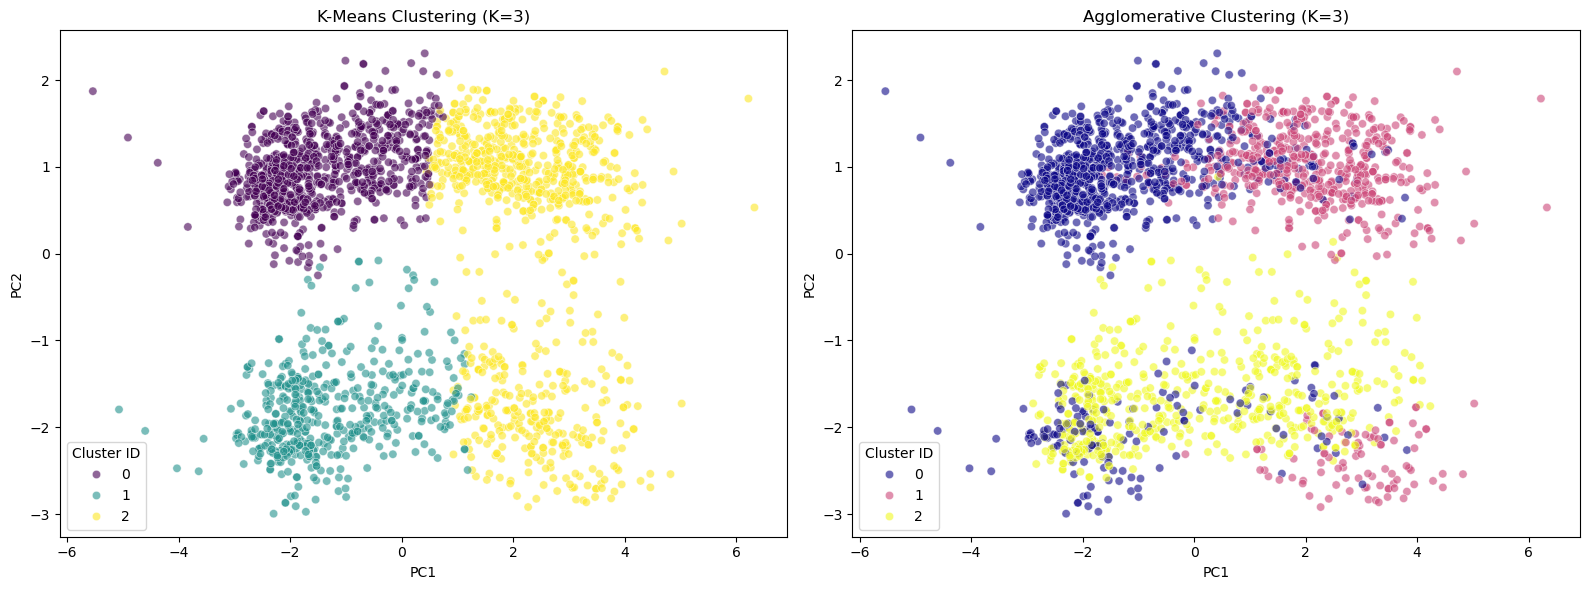

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load and Prepare Data (Assuming previous scaling/encoding is done)
# If starting from the scaled file:
df_scaled_data = pd.read_csv('smartcart_scaled.csv')

# 2. Dimensionality Reduction (PCA)
# We reduce the data to 2 components so we can plot it on a 2D graph
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled_data)
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# 3. Apply K-Means Clustering
# We use K=3 as determined by the Elbow and Silhouette methods
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
df_pca['KMeans_Cluster'] = kmeans.fit_predict(df_scaled_data)

# 4. Apply Agglomerative Clustering
# This hierarchical approach groups data points based on proximity
agg_cluster = AgglomerativeClustering(n_clusters=3)
df_pca['Agg_Cluster'] = agg_cluster.fit_predict(df_scaled_data)

# 5. Visualize the Results
plt.figure(figsize=(16, 6))

# Subplot 1: K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='KMeans_Cluster', palette='viridis', alpha=0.6)
plt.title('K-Means Clustering (K=3)')
plt.legend(title='Cluster ID')

# Subplot 2: Agglomerative Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Agg_Cluster', palette='plasma', alpha=0.6)
plt.title('Agglomerative Clustering (K=3)')
plt.legend(title='Cluster ID')

plt.tight_layout()
plt.savefig('clustering_comparison.png')

# Characterization of Clusters

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\ysawa\AppData\Local\Temp\ipykernel_30956\4281251320.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Cluster', palette='viridis')


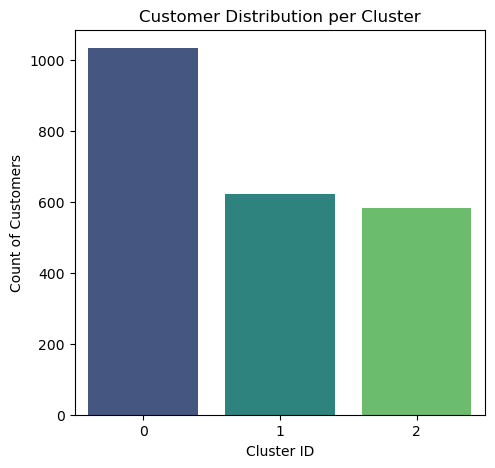

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Resolve potential environment warnings
os.environ["OMP_NUM_THREADS"] = "1"

# 2. Complete Preprocessing & Feature Engineering
df = pd.read_csv('smartcart_customers.csv')
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Age'] = 2024 - df['Year_Birth']
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Remove Outliers to ensure clear characterization
df_clean = df[(df['Income'] <= 600000) & (df['Age'] <= 90)].copy()

# Prepare and Scale for Clustering
df_prepared = df_clean.drop(columns=['ID', 'Year_Birth', 'Dt_Customer', 'Education', 'Marital_Status'])
df_encoded = pd.get_dummies(df_prepared, dtype=int)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# 3. Apply K-Means (K=3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
df_clean['Cluster'] = kmeans.fit_predict(df_scaled)

# 4. Cluster Characterization Visualizations
plt.figure(figsize=(18, 5))

# A. Count Plot: Number of customers in each cluster
plt.subplot(1, 3, 1)
sns.countplot(data=df_clean, x='Cluster', palette='viridis')
plt.title('Customer Distribution per Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Count of Customers')



# Save the final labeled dataset
df_clean.to_csv('smartcart_final_clusters.csv', index=False)

# Relation between income and total spending

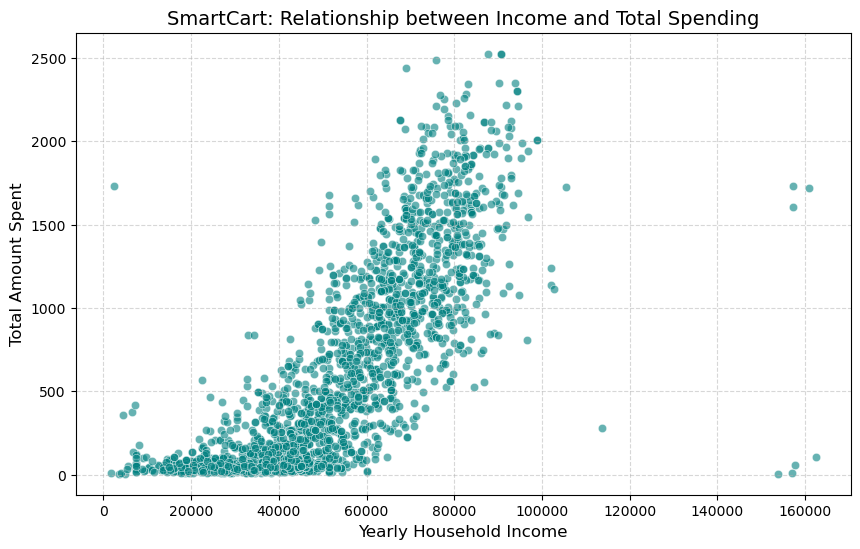

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('smartcart_customers.csv')

# 2. Preprocessing: Handle missing values in Income 
df['Income'] = df['Income'].fillna(df['Income'].median())

# 3. Feature Engineering: Calculate Total Spending
# Summing all amount spent columns: Wines, Fruits, Meat, Fish, Sweets, and Gold 
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

# 4. Handle extreme outliers for better visualization scale
# (Excluding the extreme ~600k income record ensures the main data points are visible)
df_plot = df[df['Income'] <= 600000]

# 5. Create the Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='Income', y='Total_Spending', alpha=0.6, color='teal')

# Add labels and title
plt.title('SmartCart: Relationship between Income and Total Spending', fontsize=14)
plt.xlabel('Yearly Household Income', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Save the plot
plt.savefig('income_vs_spending_scatter.png')

# Cluster Summary

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Full Preprocessing & Clustering (K=3)
df = pd.read_csv('smartcart_customers.csv')
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Age'] = 2024 - df['Year_Birth']
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Customer_Days'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

# Data cleaning and encoding
df_clean = df[(df['Income'] <= 600000) & (df['Age'] <= 90)].copy()
df_encoded = pd.get_dummies(df_clean.drop(columns=['ID', 'Year_Birth', 'Dt_Customer']), dtype=int)

# Scaling and Clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clean['Cluster'] = kmeans.fit_predict(df_scaled)

# 2. Generate Cluster Summary (Means for each feature)
# List of numerical features to summarize
features = ['Income', 'Age', 'Total_Spending', 'Total_Children', 'Recency', 
            'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_Days']

cluster_summary = df_clean.groupby('Cluster')[features].mean()

# Add the count of customers in each cluster
cluster_summary['Customer_Count'] = df_clean['Cluster'].value_counts().sort_index()

# 3. Display and Save
print("--- Cluster Summary Table (Means) ---")
print(cluster_summary)
cluster_summary.to_csv('cluster_summary.csv')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


--- Cluster Summary Table (Means) ---
               Income        Age  Total_Spending  Total_Children    Recency  \
Cluster                                                                       
0        35163.288038  52.282297       99.260287        1.236364  49.436364   
1        75627.706034  55.458621     1382.170690        0.191379  49.591379   
2        58193.681669  59.585925      735.842881        1.183306  48.117840   

         NumWebPurchases  NumStorePurchases  NumWebVisitsMonth  Customer_Days  \
Cluster                                                                         
0               2.126316           3.228708           6.444976     321.018182   
1               5.227586           8.313793           2.872414     360.782759   
2               6.360065           7.795417           5.715221     403.140753   

         Customer_Count  
Cluster                  
0                  1045  
1                   580  
2                   611  
